In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score

In [15]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-5 Python_Decision_Tree_Classification_Airline_Safety_Analysis

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-5 Python_Decision_Tree_Classification_Airline_Safety_Analysis


# Part-1: Data Exploration and Pre-processing

In [81]:
pd.set_option("display.max_columns",None)

In [340]:
# 1) load the given dataset
df=pd.read_csv("Python_Project_5_Decision_Tree_Classifier.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [341]:
df.shape

(10000, 25)

In [342]:
# 2) print all the column names
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [343]:
# 3) describe the data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [344]:
# 4) Drop the column ‘Unnamed’
df.drop('Unnamed: 0',axis=1,inplace=True)

In [355]:
df.shape

(10000, 24)

In [363]:
col=[]
for i in df.columns:
    col.append(i.replace(" ","_"))

In [365]:
df.columns=col

In [366]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [22]:
# df.columns=[each.replace(" ","_") for each in df.columns]

In [367]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [368]:
# 6) Plot the number of satisfied customers and the number of unsatisfied customers
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [369]:
df['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace = True)

In [370]:
df.satisfaction.unique()

array([0, 1], dtype=int64)

In [371]:
df.satisfaction.value_counts()

0    5689
1    4311
Name: satisfaction, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

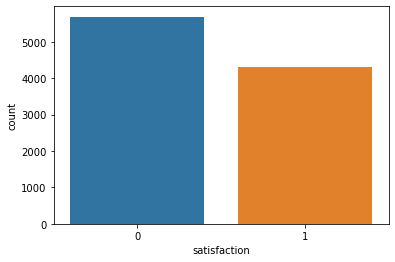

In [372]:
sns.countplot('satisfaction',data=df)

In [373]:
# 7) Plot the mean value of satisfaction of male and female customers
df[['Gender','satisfaction']].groupby(['Gender'],as_index=False).mean()

,Gender,satisfaction
0,Female,0.424432
1,Male,0.438062


<AxesSubplot:>

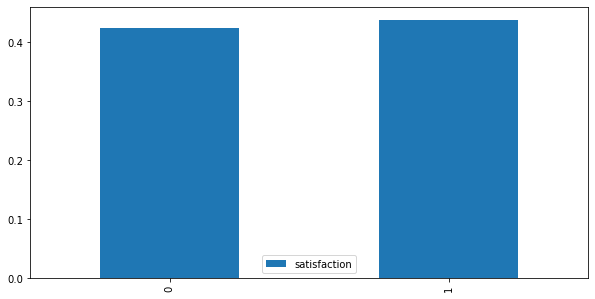

In [374]:
df[['Gender','satisfaction']].groupby(['Gender'],as_index=False).mean().plot(kind='bar',figsize=(10,5))

In [375]:
# 8) Plot the mean value of satisfaction of customers with respect to Age.
df[['Age','satisfaction']].groupby(['Age'],as_index=False).mean()

,Age,satisfaction
0,7,0.071429
1,8,0.081967
2,9,0.194030
3,10,0.137255
4,11,0.115942
...,...,...
69,76,0.000000
70,77,0.222222
71,79,0.666667
72,80,0.111111


<AxesSubplot:>

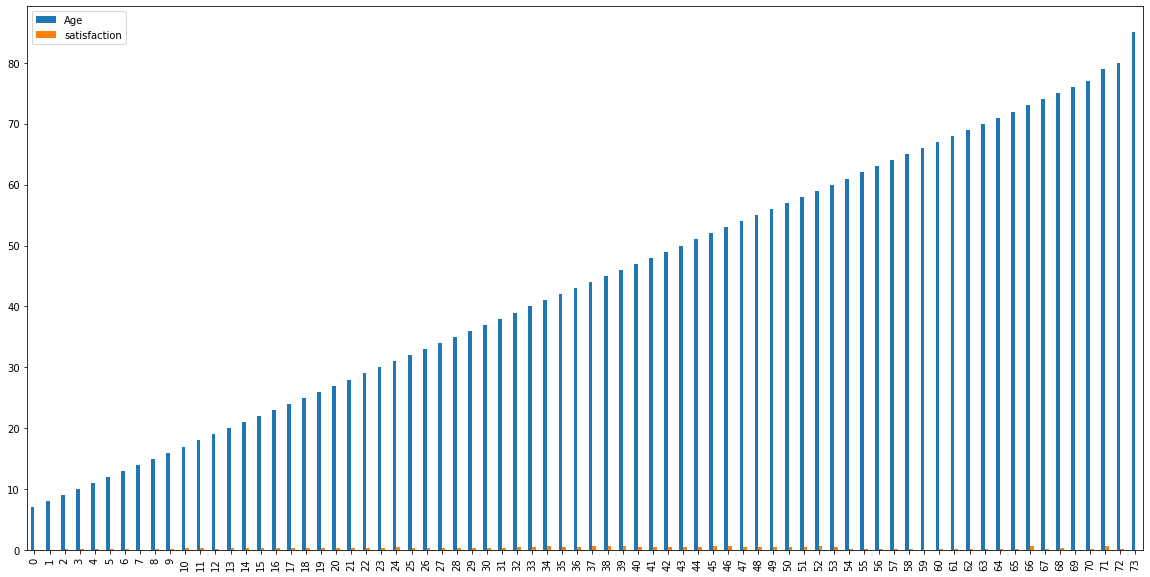

In [376]:
df[['Age','satisfaction']].groupby(['Age'],as_index=False).mean().plot(kind='bar',figsize=(20,10))

In [377]:
# 9) Plot the mean value of satisfaction of customers with respect to Food_and_drink.
df[['Food_and_drink','satisfaction']].groupby(['Food_and_drink'],as_index=False).mean()

,Food_and_drink,satisfaction
0,0,0.625000
1,1,0.198142
2,2,0.362305
3,3,0.404990
4,4,0.515050
5,5,0.566176


<AxesSubplot:>

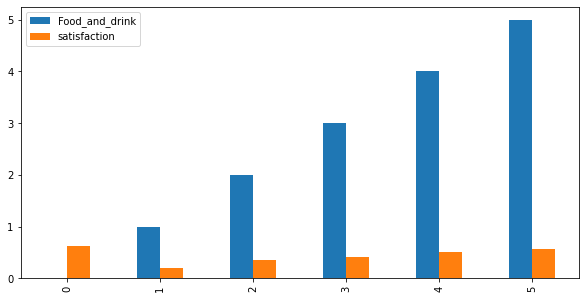

In [378]:
df[['Food_and_drink','satisfaction']].groupby(['Food_and_drink'],as_index=False).mean().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='Flight_Distance'>

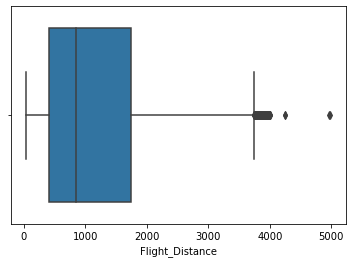

In [379]:
# 10) Display a boxplot for Flight_Distance
sns.boxplot(x='Flight_Distance',data=df)

<AxesSubplot:>

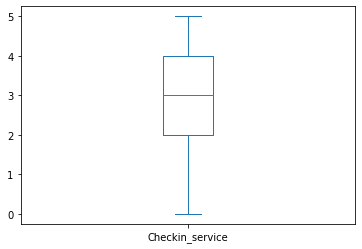

In [380]:
# 11) Display a boxplot for Checkin_service
df["Checkin_service"].plot(kind='box')

In [381]:
# 12) Find all the Null values
df.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [382]:
# 13) Drop all the na values
df=df.dropna()

In [383]:
df.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [384]:
# 14) Find the unique values in Flight_Distance
df["Flight_Distance"].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

# Part-2: Working with Models


In [385]:
# 1) Perform encoding in columns Gender, Customer_Type, Type_of_Travel, and Class.
from sklearn.preprocessing import LabelEncoder

In [386]:
label=LabelEncoder()

In [387]:
import warnings
warnings.filterwarnings("ignore")

In [388]:
df[['Gender','Customer_Type','Type_of_Travel','Class']]=df[['Gender','Customer_Type','Type_of_Travel','Class']].apply(label.fit_transform)

In [389]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [390]:
# 2) Drop the column id
df.drop('id',axis=1,inplace=True)

In [391]:
df.shape

(9974, 23)

In [392]:
# 3) Create the features and target Data
from sklearn.model_selection import train_test_split

In [393]:
x=df.drop("satisfaction",axis=1)
y=df["satisfaction"]

In [394]:
x.shape

(9974, 22)

In [395]:
y.shape

(9974,)

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [396]:
x_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
4806,-0.978377,2.136058,-0.879349,-0.663386,-0.947100,-0.436049,-1.304362,-1.334595,-1.250451,1.581480,...,0.443862,0.495903,-0.284097,1.260872,0.319439,0.562836,0.315212,0.554641,-0.386368,-0.392755
3655,-0.978377,-0.468152,-1.276117,1.507418,0.661068,0.275701,1.707841,0.629103,1.601106,0.802571,...,-1.064257,-0.995918,-1.836318,1.260872,-1.360987,0.562836,-0.531294,-0.959107,-0.386368,-0.392755
5266,1.022101,2.136058,-0.085813,-0.663386,-0.947100,0.000185,-1.304362,-1.334595,-1.250451,-0.755246,...,-1.064257,-0.995918,-0.284097,1.260872,0.319439,-0.225277,0.315212,-0.959107,-0.386368,-0.392755
8423,-0.978377,2.136058,0.046443,-0.663386,-0.947100,-0.396119,-1.304362,-1.334595,-1.250451,-1.534155,...,-1.818316,-1.741829,0.492014,-0.264779,1.159652,1.350948,1.161719,-1.715981,-0.386368,-0.392755
449,1.022101,-0.468152,0.575467,-0.663386,-0.947100,1.982700,-0.551311,-0.680029,-0.537562,-0.755246,...,0.443862,1.241813,1.268125,1.260872,1.159652,1.350948,1.161719,1.311516,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,1.022101,-0.468152,0.707724,1.507418,0.661068,-0.768464,0.201740,-1.989161,0.175328,1.581480,...,-0.310197,-0.250008,1.268125,1.260872,1.159652,1.350948,1.161719,-0.202233,-0.386368,-0.392755
7291,-0.978377,-0.468152,2.030284,1.507418,0.661068,-0.647677,-1.304362,0.629103,-1.250451,0.802571,...,1.197922,-0.250008,-0.284097,-1.790429,-0.520774,-0.225277,-0.531294,1.311516,-0.386368,-0.392755
1344,1.022101,2.136058,-0.019685,-0.663386,0.661068,-0.960127,-1.304362,-0.025463,-1.250451,0.023662,...,0.443862,0.495903,0.492014,-1.027604,0.319439,-0.225277,0.315212,0.554641,-0.203350,0.895631
7293,1.022101,2.136058,-0.085813,-0.663386,0.661068,-0.619726,-0.551311,0.629103,0.175328,0.023662,...,1.197922,1.241813,-0.284097,1.260872,-0.520774,-0.225277,0.315212,1.311516,-0.386368,-0.160845


In [397]:
x_test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
9408,1.022101,-0.468152,0.509339,1.507418,0.661068,-0.268343,-1.304362,-0.025463,-1.963340,0.023662,...,1.197922,1.241813,-1.060207,-1.790429,-0.520774,-1.801501,-1.377801,1.311516,-0.386368,-0.392755
6415,-0.978377,-0.468152,0.509339,1.507418,0.661068,-0.394122,-0.551311,1.283668,-0.537562,-0.755246,...,-1.064257,1.241813,1.268125,-1.027604,1.159652,-1.013389,1.161719,-1.715981,-0.386368,-0.392755
2447,1.022101,-0.468152,0.972236,1.507418,0.661068,-1.095889,-0.551311,0.629103,-0.537562,0.023662,...,-0.310197,-0.250008,1.268125,1.260872,1.159652,-0.225277,0.315212,-0.202233,-0.386368,-0.392755
6479,-0.978377,2.136058,-1.143861,-0.663386,-0.947100,1.363788,-0.551311,-0.680029,-0.537562,0.802571,...,1.197922,1.241813,-1.060207,1.260872,-0.520774,0.562836,-0.531294,1.311516,-0.386368,-0.392755
1572,-0.978377,-0.468152,-1.011605,-0.663386,-0.947100,2.207305,1.707841,1.283668,1.601106,1.581480,...,0.443862,0.495903,-0.284097,-1.027604,0.319439,0.562836,0.315212,0.554641,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.978377,-0.468152,0.707724,-0.663386,-0.947100,0.947520,0.954790,0.629103,0.888217,0.802571,...,0.443862,1.241813,1.268125,1.260872,1.159652,-0.225277,1.161719,0.554641,0.031960,-0.263916
3202,1.022101,2.136058,-1.209989,-0.663386,-0.947100,-0.949147,1.707841,-1.989161,1.601106,0.802571,...,0.443862,0.495903,-0.284097,0.498047,1.159652,0.562836,1.161719,0.554641,0.136542,0.174135
4655,-0.978377,-0.468152,-0.085813,-0.663386,-0.947100,2.094504,0.201740,-0.025463,0.175328,0.023662,...,-1.818316,1.241813,1.268125,1.260872,1.159652,-1.801501,1.161719,1.311516,-0.386368,-0.392755
1969,1.022101,-0.468152,-0.482581,1.507418,0.661068,-0.330234,0.201740,-0.025463,0.175328,-1.534155,...,0.443862,0.495903,0.492014,-1.027604,-0.520774,0.562836,0.315212,0.554641,-0.386368,-0.392755


In [398]:
y_train

4818    0
3663    1
5279    0
8443    0
450     1
       ..
9394    0
7309    0
1346    0
7311    0
1291    1
Name: satisfaction, Length: 6981, dtype: int64

In [399]:
y_test

9430    0
6431    0
2452    0
6495    0
1575    1
       ..
5508    1
3209    1
4666    1
1972    0
5598    0
Name: satisfaction, Length: 2993, dtype: int64

In [400]:
model=DecisionTreeClassifier()

In [401]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [402]:
model.score(x_train,y_train)

1.0

In [403]:
model.score(x_test,y_test)

0.9181423321082526

# After SCaling X Data

In [404]:
# 4) Perform scaling on features data
from sklearn.preprocessing import StandardScaler 

In [405]:
x_scale_data=StandardScaler()

In [406]:
scale=x_scale_data.fit_transform(x)

In [408]:
data=pd.DataFrame(scale,columns=x.columns)

In [409]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1.022101,-0.468152,-1.739013,1.507418,2.269235,-0.737519,0.201740,0.629103,0.175328,-1.534155,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,1.161719,1.311516,0.267269,0.071064
1,1.022101,2.136058,-0.945477,-0.663386,-0.947100,-0.962124,0.201740,-0.680029,0.175328,0.023662,...,-1.818316,-1.741829,-1.836318,1.260872,-0.520774,-1.801501,0.315212,-1.715981,-0.360223,-0.238149
2,-0.978377,-0.468152,-0.879349,-0.663386,-0.947100,-0.056715,-0.551311,-0.680029,-0.537562,-0.755246,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,0.315212,1.311516,-0.386368,-0.392755
3,-0.978377,-0.468152,-0.945477,-0.663386,-0.947100,-0.635698,-0.551311,1.283668,1.601106,1.581480,...,-1.064257,-0.995918,-1.060207,1.260872,-0.520774,-1.801501,0.315212,-0.959107,-0.098768,-0.160845
4,1.022101,-0.468152,1.435132,-0.663386,-0.947100,-0.983087,0.201740,-0.025463,0.175328,0.023662,...,1.197922,-0.250008,-0.284097,0.498047,0.319439,-0.225277,-0.531294,-0.202233,-0.386368,-0.392755


In [410]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt",
            'min_samples_leaf':1,
             'min_samples_split':2,
            'criterion':'gini'}


In [412]:
# 5) Fit the decision tree model with various parameters
model_scale=DecisionTreeClassifier(**params_dt)

In [420]:
model_scale.fit(data,y)

DecisionTreeClassifier(max_depth=12, max_features='sqrt')

In [421]:
# 6) Split the data in training and testing sets
x_train,x_test,y_train,y_test=train_test_split(data,y,train_size=0.7,random_state=10)

In [422]:
x_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
4806,-0.978377,2.136058,-0.879349,-0.663386,-0.947100,-0.436049,-1.304362,-1.334595,-1.250451,1.581480,...,0.443862,0.495903,-0.284097,1.260872,0.319439,0.562836,0.315212,0.554641,-0.386368,-0.392755
3655,-0.978377,-0.468152,-1.276117,1.507418,0.661068,0.275701,1.707841,0.629103,1.601106,0.802571,...,-1.064257,-0.995918,-1.836318,1.260872,-1.360987,0.562836,-0.531294,-0.959107,-0.386368,-0.392755
5266,1.022101,2.136058,-0.085813,-0.663386,-0.947100,0.000185,-1.304362,-1.334595,-1.250451,-0.755246,...,-1.064257,-0.995918,-0.284097,1.260872,0.319439,-0.225277,0.315212,-0.959107,-0.386368,-0.392755
8423,-0.978377,2.136058,0.046443,-0.663386,-0.947100,-0.396119,-1.304362,-1.334595,-1.250451,-1.534155,...,-1.818316,-1.741829,0.492014,-0.264779,1.159652,1.350948,1.161719,-1.715981,-0.386368,-0.392755
449,1.022101,-0.468152,0.575467,-0.663386,-0.947100,1.982700,-0.551311,-0.680029,-0.537562,-0.755246,...,0.443862,1.241813,1.268125,1.260872,1.159652,1.350948,1.161719,1.311516,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,1.022101,-0.468152,0.707724,1.507418,0.661068,-0.768464,0.201740,-1.989161,0.175328,1.581480,...,-0.310197,-0.250008,1.268125,1.260872,1.159652,1.350948,1.161719,-0.202233,-0.386368,-0.392755
7291,-0.978377,-0.468152,2.030284,1.507418,0.661068,-0.647677,-1.304362,0.629103,-1.250451,0.802571,...,1.197922,-0.250008,-0.284097,-1.790429,-0.520774,-0.225277,-0.531294,1.311516,-0.386368,-0.392755
1344,1.022101,2.136058,-0.019685,-0.663386,0.661068,-0.960127,-1.304362,-0.025463,-1.250451,0.023662,...,0.443862,0.495903,0.492014,-1.027604,0.319439,-0.225277,0.315212,0.554641,-0.203350,0.895631
7293,1.022101,2.136058,-0.085813,-0.663386,0.661068,-0.619726,-0.551311,0.629103,0.175328,0.023662,...,1.197922,1.241813,-0.284097,1.260872,-0.520774,-0.225277,0.315212,1.311516,-0.386368,-0.160845


In [423]:
x_test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
9408,1.022101,-0.468152,0.509339,1.507418,0.661068,-0.268343,-1.304362,-0.025463,-1.963340,0.023662,...,1.197922,1.241813,-1.060207,-1.790429,-0.520774,-1.801501,-1.377801,1.311516,-0.386368,-0.392755
6415,-0.978377,-0.468152,0.509339,1.507418,0.661068,-0.394122,-0.551311,1.283668,-0.537562,-0.755246,...,-1.064257,1.241813,1.268125,-1.027604,1.159652,-1.013389,1.161719,-1.715981,-0.386368,-0.392755
2447,1.022101,-0.468152,0.972236,1.507418,0.661068,-1.095889,-0.551311,0.629103,-0.537562,0.023662,...,-0.310197,-0.250008,1.268125,1.260872,1.159652,-0.225277,0.315212,-0.202233,-0.386368,-0.392755
6479,-0.978377,2.136058,-1.143861,-0.663386,-0.947100,1.363788,-0.551311,-0.680029,-0.537562,0.802571,...,1.197922,1.241813,-1.060207,1.260872,-0.520774,0.562836,-0.531294,1.311516,-0.386368,-0.392755
1572,-0.978377,-0.468152,-1.011605,-0.663386,-0.947100,2.207305,1.707841,1.283668,1.601106,1.581480,...,0.443862,0.495903,-0.284097,-1.027604,0.319439,0.562836,0.315212,0.554641,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.978377,-0.468152,0.707724,-0.663386,-0.947100,0.947520,0.954790,0.629103,0.888217,0.802571,...,0.443862,1.241813,1.268125,1.260872,1.159652,-0.225277,1.161719,0.554641,0.031960,-0.263916
3202,1.022101,2.136058,-1.209989,-0.663386,-0.947100,-0.949147,1.707841,-1.989161,1.601106,0.802571,...,0.443862,0.495903,-0.284097,0.498047,1.159652,0.562836,1.161719,0.554641,0.136542,0.174135
4655,-0.978377,-0.468152,-0.085813,-0.663386,-0.947100,2.094504,0.201740,-0.025463,0.175328,0.023662,...,-1.818316,1.241813,1.268125,1.260872,1.159652,-1.801501,1.161719,1.311516,-0.386368,-0.392755
1969,1.022101,-0.468152,-0.482581,1.507418,0.661068,-0.330234,0.201740,-0.025463,0.175328,-1.534155,...,0.443862,0.495903,0.492014,-1.027604,-0.520774,0.562836,0.315212,0.554641,-0.386368,-0.392755


In [424]:
y_train

4818    0
3663    1
5279    0
8443    0
450     1
       ..
9394    0
7309    0
1346    0
7311    0
1291    1
Name: satisfaction, Length: 6981, dtype: int64

In [425]:
y_test

9430    0
6431    0
2452    0
6495    0
1575    1
       ..
5508    1
3209    1
4666    1
1972    0
5598    0
Name: satisfaction, Length: 2993, dtype: int64

In [426]:
model_scale.score(x_train,y_train)

0.952442343503796

In [427]:
model_scale.score(x_test,y_test)

0.9552288673571667

In [428]:
y_predicted=model_scale.predict(x_test)

In [429]:
y_predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [430]:
precision_score=precision_score(y_test,y_predicted)
precision_score

0.9600319744204636

In [431]:
recall_score=recall_score(y_test,y_predicted)
recall_score

0.9346303501945525

In [437]:
accuracy_score=accuracy_score(y_test,y_predicted)
accuracy_score

0.9552288673571667

In [438]:
confusion_matrix=confusion_matrix(y_test,y_predicted)
confusion_matrix

array([[1658,   50],
       [  84, 1201]], dtype=int64)

In [439]:
F1_score=f1_score(y_test,y_predicted)
F1_score

0.9471608832807572

In [440]:
classification_report=classification_report(y_test,y_predicted)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1708
           1       0.96      0.93      0.95      1285

    accuracy                           0.96      2993
   macro avg       0.96      0.95      0.95      2993
weighted avg       0.96      0.96      0.96      2993



In [441]:
# 7) Create a function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def info (y_test,y_predicted):
    print("Precision_Score =",precision_score(y_test,y_predicted))
    print("recall_Score =",recall_score(y_test,y_predicted))
    print("accuracy_score =",accuracy_score(y_test,y_predicted))
    print("F1_Score =",f1_score(y_test,y_predicted))
    print("classification_report =",classification_report(y_test,y_predicted))
    print("confusion matrix is :")
    print(confusion_matrix(y_test,y_predicted))

In [444]:
info (y_test,y_predicted)

Precision_Score = 0.9600319744204636
recall_Score = 0.9346303501945525
accuracy_score = 0.9552288673571667
F1_Score = 0.9471608832807572
classification_report =               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1708
           1       0.96      0.93      0.95      1285

    accuracy                           0.96      2993
   macro avg       0.96      0.95      0.95      2993
weighted avg       0.96      0.96      0.96      2993

confusion matrix is :
[[1658   50]
 [  84 1201]]
